<a href="https://colab.research.google.com/github/tjtrebat/air-quality-analysis/blob/Linear_regression_temp/compared_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV file
file_path = '/content/houston-aqi-2010-2021.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

   Unnamed: 0  day_of_year  year   latitude  longitude  avg_pm10  aqi_pm10  \
0           0            2  2010  29.733726 -95.257593      13.0        12   
1           1            2  2010  29.733726 -95.257593      13.0        12   
2           2            2  2010  29.733726 -95.257593      13.0        12   
3           3            2  2010  29.733726 -95.257593      13.0        12   
4           4            2  2010  29.733726 -95.257593      13.0        12   

     avg_co  aqi_co    avg_no2  ...    avg_o3  aqi_o3  avg_pm25  aqi_pm25  \
0  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
1  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
2  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
3  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
4  0.325000     6.0  17.258333  ...  0.027294      32      11.6      48.0   

    avg_so2  aqi_so2  avg_humidity  avg_temperature  avg_wind  avg_p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Temperature Vs Humidity**

Mean Squared Error for temperature vs humidity: 87.50234009820106


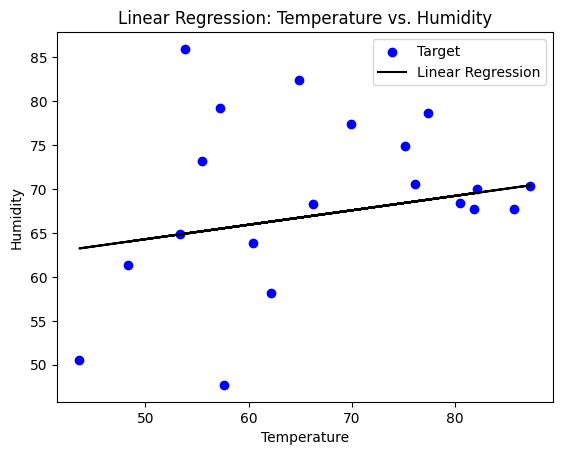

In [ ]:
#temperature vs. humidity
temperature_column = 'avg_temperature'
humidity_column = 'avg_humidity'

# Selecting 100 random samples
df_random = df.sample(n=100, random_state=42)

# Selecting features
X_humidity_random = df_random[temperature_column].values.reshape(-1, 1)
y_humidity_random = df_random[humidity_column].values

#data split to training and testing
X_train_humidity_random, X_test_humidity_random, y_train_humidity_random, y_test_humidity_random = train_test_split(
    X_humidity_random, y_humidity_random, test_size=0.2, random_state=42)

#linear regression model
model_humidity_random = LinearRegression()
model_humidity_random.fit(X_train_humidity_random, y_train_humidity_random)

#Predictions
predictions_humidity_random = model_humidity_random.predict(X_test_humidity_random)

#mean squared error for temperature vs. humidity using 100 random samples
mse_humidity_random = mean_squared_error(y_test_humidity_random, predictions_humidity_random)
print(f'Mean Squared Error for temperature vs humidity: {mse_humidity_random}')

# plot of linear regression line for temperature vs. humidity using 100 random samples
plt.scatter(X_test_humidity_random, y_test_humidity_random, color='blue', label='Target')
plt.plot(X_test_humidity_random, predictions_humidity_random, color='black', label='Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.title('Linear Regression: Temperature vs. Humidity')
plt.show()


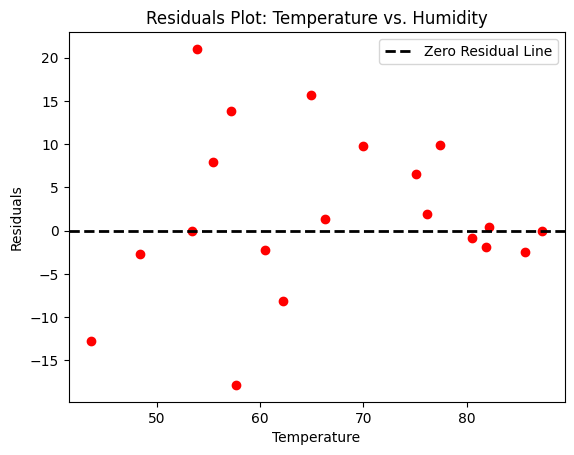

In [ ]:
# Calculating residuals for temperature vs. humidity
residuals_humidity = y_test_humidity_random - predictions_humidity_random

# Plotting residuals for temperature vs. humidity
plt.scatter(X_test_humidity_random, residuals_humidity, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals Plot: Temperature vs. Humidity')
plt.show()


From the above Residual Plot output we can conclude that the regression equation is a not a good model, since the residual plot becomes wider.



## **Temperature Vs Pressure**

Mean Squared Error for Temperature vs. Pressure: 16.8077917932132


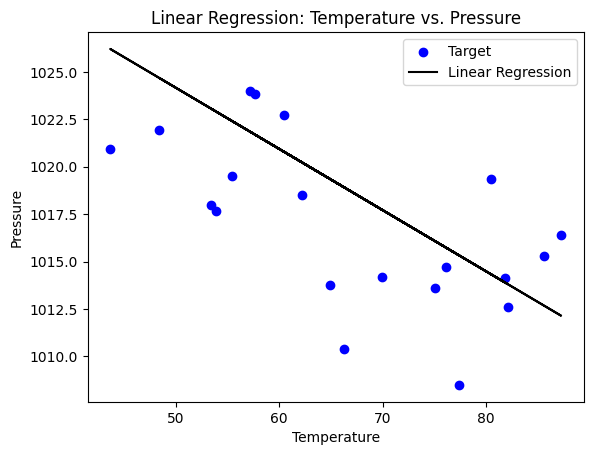

In [ ]:
# Selecting the features for temperature vs. pressure
temperature_column = 'avg_temperature'
pressure_column = 'avg_pressure'

# Selecting 100 random samples
df_random = df.sample(n=100, random_state=42)

# Selecting the features
X_pressure = df_random[temperature_column].values.reshape(-1, 1)
y_pressure = df_random[pressure_column].values

#data split into training and testing
X_train_pressure, X_test_pressure, y_train_pressure, y_test_pressure = train_test_split(
    X_pressure, y_pressure, test_size=0.2, random_state=42)

#linear regression model for temperature vs. pressure using 100 random samples
model_pressure = LinearRegression()
model_pressure.fit(X_train_pressure, y_train_pressure)

# Make predictions on the test set
predictions_pressure = model_pressure.predict(X_test_pressure)

# Calculation for mean squared error
mse_pressure = mean_squared_error(y_test_pressure, predictions_pressure)
print(f'Mean Squared Error for Temperature vs. Pressure: {mse_pressure}')

# Plotting linear regression
plt.scatter(X_test_pressure, y_test_pressure, color='blue', label='Target')
plt.plot(X_test_pressure, predictions_pressure, color='black', label='Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.title('Linear Regression: Temperature vs. Pressure')
plt.show()


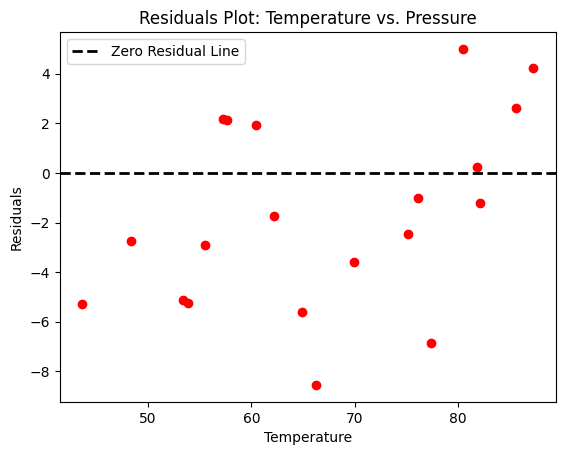

In [ ]:
# Calculating residuals for temperature vs. pressure
residuals_pressure = y_test_pressure - predictions_pressure

# Plotting residuals for temperature vs. pressure
plt.scatter(X_test_pressure, residuals_pressure, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals Plot: Temperature vs. Pressure')
plt.show()


From the above Residual Plot output we can conclude that the regression equation is a good model.

## **Temperature Vs Wind**

Mean Squared Error for Temperature vs. Wind: 5.593820090799985


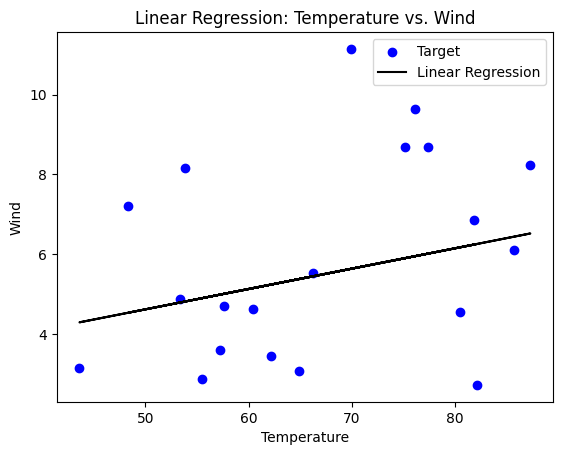

In [ ]:
# Selecting features for temperature vs. wind
wind_column = 'avg_wind'

# Selecting 100 random samples
df_wind = df.sample(n=100, random_state=42)

# Selecting features
X_wind = df_wind[temperature_column].values.reshape(-1, 1)
y_wind = df_wind[wind_column].values

# Splitting the data into training and testing sets
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(
    X_wind, y_wind, test_size=0.2, random_state=42)

# linear regression model for temperature vs. wind using 100 random samples
model_wind = LinearRegression()
model_wind.fit(X_train_wind, y_train_wind)

# predictions on the test set
predictions_wind = model_wind.predict(X_test_wind)

# Calculation for the mean squared error
mse_wind = mean_squared_error(y_test_wind, predictions_wind)
print(f'Mean Squared Error for Temperature vs. Wind: {mse_wind}')

# Plotting the linear regression line for temperature vs. wind using 100 random samples
plt.scatter(X_test_wind, y_test_wind, color='blue', label='Target')
plt.plot(X_test_wind, predictions_wind, color='black', label='Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Wind')
plt.legend()
plt.title('Linear Regression: Temperature vs. Wind')
plt.show()


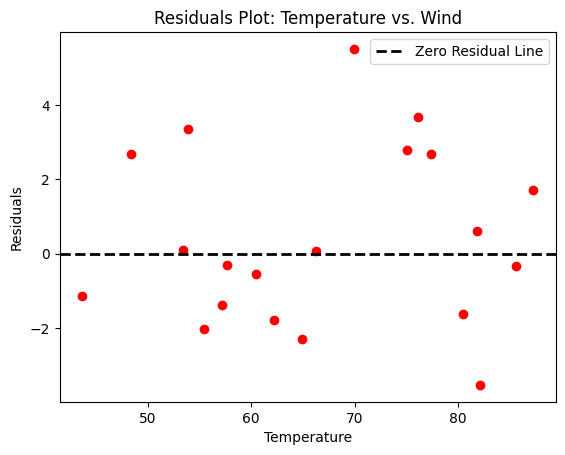

In [ ]:
# Calculate residuals
residuals_wind = y_test_wind - predictions_wind

# Plotting residuals
plt.scatter(X_test_wind, residuals_wind, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals Plot: Temperature vs. Wind')
plt.show()


From the above Residual Plot output we can conclude that the regression equation is a not a good model, since the residual plot becomes wider.